In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])



60000
(60000, 28, 28)
60000
[9 0 0 3 0]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


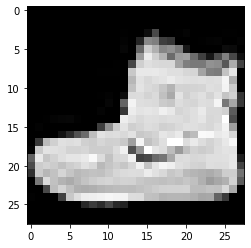

In [ ]:
import matplotlib.pyplot as plt


digit = X_train[0]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150 )

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [ ]:

X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [ ]:
# one hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
%%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.5673 - accuracy: 0.7932 - val_loss: 0.4454 - val_accuracy: 0.8380
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3874 - accuracy: 0.8568 - val_loss: 0.3861 - val_accuracy: 0.8622
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3422 - accuracy: 0.8734 - val_loss: 0.3371 - val_accuracy: 0.8777
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3172 - accuracy: 0.8820 - val_loss: 0.3872 - val_accuracy: 0.8598
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2967 - accuracy: 0.8896 - val_loss: 0.3460 - val_accuracy: 0.8793
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2811 - accuracy: 0.8953 - val_loss: 0.3802 - val_accuracy: 0.8718
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2676 - accuracy: 0.8999 - val_loss: 0.3518 - val_accuracy: 0.8812

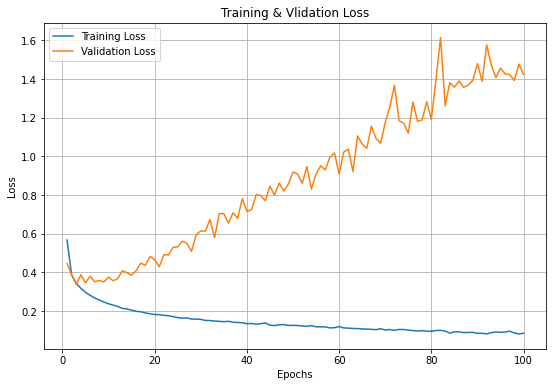

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])

plt.title('Training & Vlidation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.5882 - accuracy: 0.8891
Loss = 1.58823
Accuracy = 0.88910


In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(mnist.predict_classes(X_test[:1, :]))

[9]
